<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/PreProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre-processamento com a base do Kaggle

> Bloco com recuo



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

atletas = pd.read_csv("https://raw.githubusercontent.com/andrefmb/EDA_Olimpiadas/master/athlete_events.csv")
noc = pd.read_csv("https://raw.githubusercontent.com/andrefmb/EDA_Olimpiadas/master/noc_regions.csv")

#Estrutura
atletas.head()
noc.head()

atletas.describe()

#Verificar Missing Data


ID            Age  ...         Weight           Year
count  271116.000000  261642.000000  ...  208241.000000  271116.000000
mean    68248.954396      25.556898  ...      70.702393    1978.378480
std     39022.286345       6.393561  ...      14.348020      29.877632
min         1.000000      10.000000  ...      25.000000    1896.000000
25%     34643.000000      21.000000  ...      60.000000    1960.000000
50%     68205.000000      24.000000  ...      70.000000    1988.000000
75%    102097.250000      28.000000  ...      79.000000    2002.000000
max    135571.000000      97.000000  ...     214.000000    2016.000000

[8 rows x 5 columns]

#Verificar Missing Data

In [8]:
atletas.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

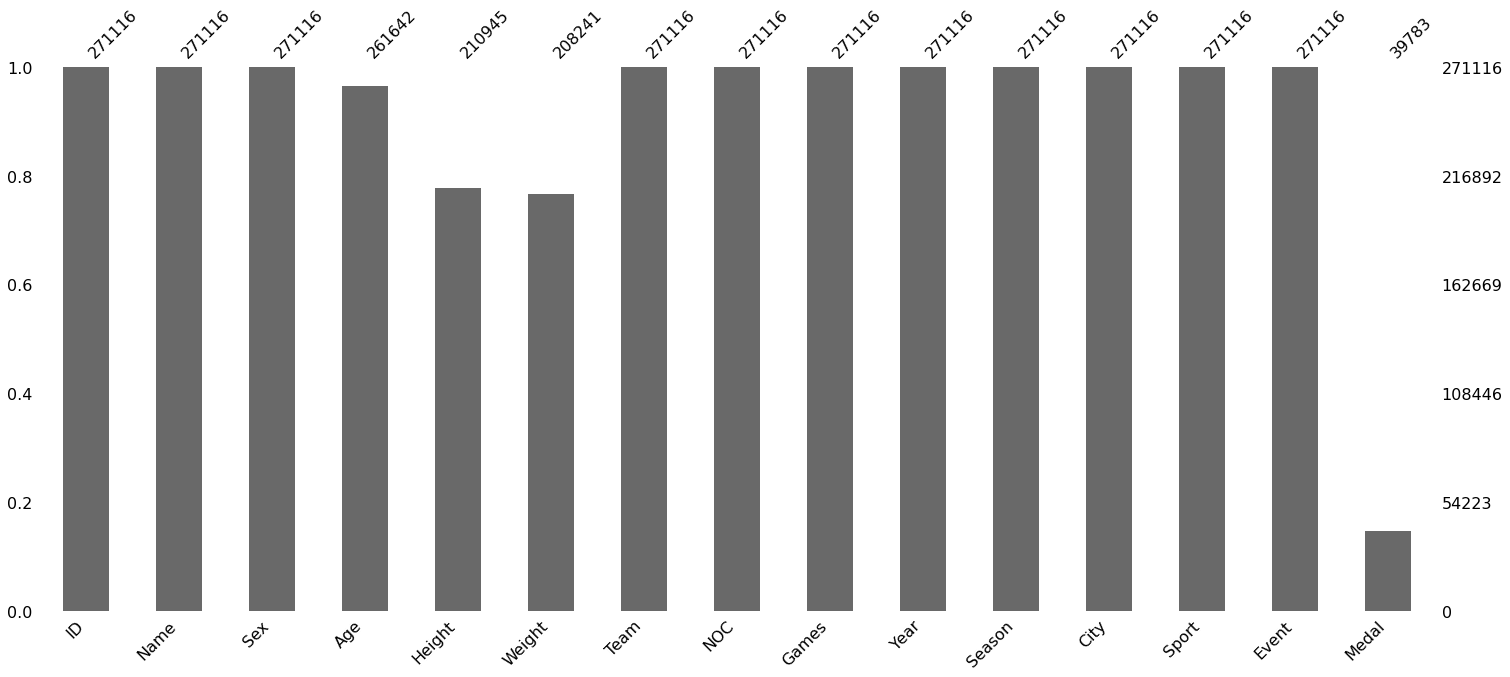

In [9]:
# grafico dos missing
import missingno as msno
msno.bar(atletas)

Filtrar uma massa de dados exemplo Rio2016

In [19]:
rio2016 = atletas[atletas['Year']==2016]
rio2016.describe()
rio2016['Medal'].value_counts()
## quantas medalhas por esporte
rio2016[rio2016['Medal'].notnull()].groupby(['NOC','Sport','Medal'])[['Event']].nunique()

Event
NOC Sport     Medal        
ALG Athletics Silver      2
ARG Hockey    Gold        1
    Judo      Gold        1
    Sailing   Gold        1
    Tennis    Silver      1
...                     ...
VEN Athletics Silver      1
    Boxing    Bronze      1
    Cycling   Bronze      1
VIE Shooting  Gold        1
              Silver      1

[620 rows x 1 columns]

In [29]:
# indice de medalhas do Rio
medalhas = rio2016.groupby(['NOC','Sport','Medal']).nunique().index
# algum pais ganhou todas medalhas?
medalhas = medalhas.to_frame()
medalhas.head()


NOC      Sport   Medal
NOC Sport     Medal                         
ALG Athletics Silver  ALG  Athletics  Silver
ARG Hockey    Gold    ARG     Hockey    Gold
    Judo      Gold    ARG       Judo    Gold
    Sailing   Gold    ARG    Sailing    Gold
    Tennis    Silver  ARG     Tennis  Silver

In [ ]:
#resetar indice
medalhas=medalhas.reset_index(drop=True)
# pivotar o data frame medalhas
medalhas.pivot_table(values='NOC', index = 'Sport', columns = 'Medal', aggfunc = 'first')


QUAIS SAO OS CAMPEOES?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


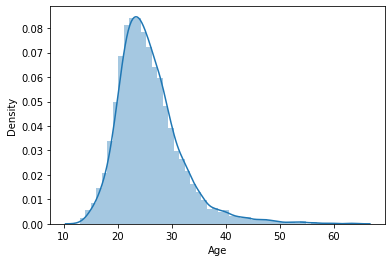

In [40]:
gold = atletas[atletas['Medal']=='Gold']
#gold['Age'].hist()
sns.distplot(gold['Age'] , hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


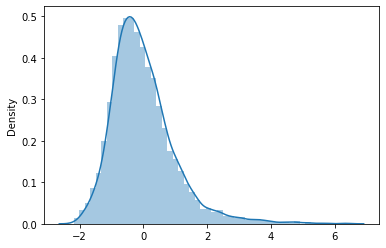

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_age = sc.fit_transform(gold[['Age']])

sns.distplot(std_age , hist = True)

Tratamento de Ruidos e Discretizacao


In [46]:
g 
gold['Age'].describe()

count    13224.000000
mean        25.901013
std          5.892887
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         64.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


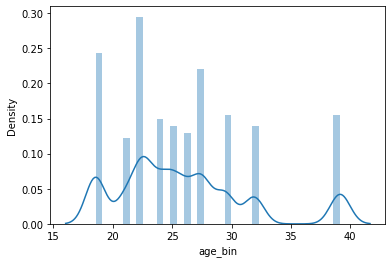

In [52]:
# dividindo em 10 grupos
bins = pd.qcut(gold['Age'],10)
grupos = gold['Age'].groupby(bins)
medias = grupos.mean()
new_age = bins.apply(lambda x : medias[x])
gold.loc[:, 'age_bin'] = new_age.copy()
#gold.head()
sns.distplot(gold['age_bin'] , hist = True)

In [55]:
# tira o limite de 500 linhas
alt.data_transformers.disable_max_rows()
# DataTransformerRegistry.enable('default')
alt.Chart(gold).mark_bar().encode(
    x = 'Age', y = 'count()', tooltip = ['Age', 'Sex', 'count()'], 
    color = alt.Color('Sex')
).interactive()

alt.Chart(...)

In [56]:
gold50 = gold[gold['Age'] >50]
gold50['Sport'].value_counts()


Equestrianism       18
Sailing             12
Shooting            11
Archery             11
Art Competitions     8
Curling              2
Alpinism             1
Roque                1
Croquet              1
Name: Sport, dtype: int64